### PART A: ARCH_GARCH Model

In [3]:
pip install arch

  Obtaining dependency information for arch from https://files.pythonhosted.org/packages/37/08/acd7fbc1e15b4701b5be3acd6fd575865a274885ea6bc72ec7af909cc7e5/arch-7.0.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 10.2/924.9 kB ? eta -:--:--
   ---------------------------------------- 10.2/924.9 kB ? eta -:--:--
   - ------------------------------------- 30.7/924.9 kB 163.8 kB/s eta 0:00:06
   - ------------------------------------- 41.0/924.9 kB 163.4 kB/s eta 0:00:06
   - ------------------------------------- 41.0/924.9 kB 163.4 kB/s eta 0:00:06
   -- ------------------------------------ 61.4/924.9 kB 218.8 kB/s eta 0:00:04
   --- ----------------------------------- 92.2/924.9 kB 261.7 kB/s eta 0:00:04
   ----- -------------------------------- 122.9/924.9 kB 313.8 kB/s eta 0:00:03
   ------ ----------------------

In [4]:

import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

In [5]:
# Get the data for Tata Motors
ticker = "HMC"

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1364.93
Distribution:                  Normal   AIC:                           2735.85
Method:            Maximum Likelihood   BIC:                           2749.72
                                        No. Observations:                  752
Date:                Thu, Jul 25 2024   Df Residuals:                      751
Time:                        10:07:53   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0578  5.443e-02      1.063      0.288 [-4.88

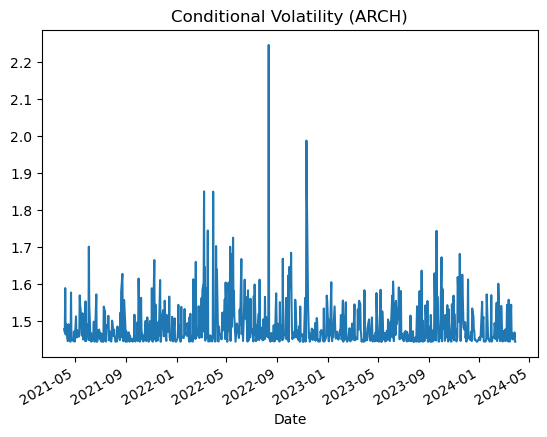

In [6]:
# Create 'Returns' column
data['Returns'] = 100 * data['Adj Close'].pct_change().dropna()

# Fit an ARCH model
arch_model_fit = arch_model(data['Returns'].dropna(), vol='ARCH', p=1).fit(disp='off')
print(arch_model_fit.summary())

# Plot the conditional volatility
arch_model_fit.conditional_volatility.plot(title='Conditional Volatility (ARCH)')
plt.show()

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1358.33
Distribution:                  Normal   AIC:                           2724.65
Method:            Maximum Likelihood   BIC:                           2743.14
                                        No. Observations:                  752
Date:                Thu, Jul 25 2024   Df Residuals:                      751
Time:                        10:08:12   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0713  5.257e-02      1.356      0.175 [-3.17

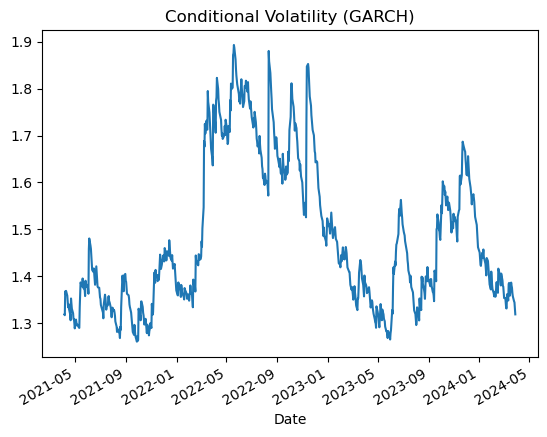

In [7]:
# Drop NaN values from 'Returns'
returns = data['Returns'].dropna()

# Fit a GARCH model
garch_model_fit = arch_model(returns, vol='Garch', p=1, q=1).fit(disp='off')
print(garch_model_fit.summary())

# Plot the conditional volatility
garch_model_fit.conditional_volatility.plot(title='Conditional Volatility (GARCH)')
plt.show()

In [8]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=10)

Iteration:     10,   Func. Count:     65,   Neg. LLF: 1358.3254925453325
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1358.3254066573716
            Iterations: 13
            Function evaluations: 79
            Gradient evaluations: 13


In [9]:
forecasts = res.forecast()

In [10]:
type(forecasts)

arch.univariate.base.ARCHModelForecast

In [11]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2024-03-22,37.660000,37.900002,37.599998,37.680000,37.680000,1312500,0.641030
2024-03-25,37.320000,37.439999,37.169998,37.279999,37.279999,654000,-1.061575
2024-03-26,37.320000,37.369999,37.189999,37.279999,37.279999,1903800,0.000000
2024-03-27,37.299999,37.340000,37.060001,37.320000,37.320000,1217800,0.107299
2024-03-28,37.200001,37.240002,37.080002,37.230000,37.230000,600800,-0.241158


In [12]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
Date                
2024-03-28  0.071285
                 h.1
Date                
2024-03-28  1.708141
                 h.1
Date                
2024-03-28  1.708141


In [13]:
forecasts = res.forecast(horizon=90)
print(forecasts.residual_variance.iloc[-3:])

                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2024-03-28  1.708141  1.714586  1.720951  1.727236  1.733443  1.739572   

                h.07      h.08      h.09      h.10  ...      h.81      h.82  \
Date                                                ...                       
2024-03-28  1.745626  1.751603  1.757506  1.763336  ...  2.035626  2.037988   

                h.83      h.84      h.85      h.86      h.87      h.88  \
Date                                                                     
2024-03-28  2.040322  2.042626  2.044901  2.047148  2.049367  2.051558   

                h.89     h.90  
Date                           
2024-03-28  2.053722  2.05586  

[1 rows x 90 columns]


In [14]:
forecasts.residual_variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.81,h.82,h.83,h.84,h.85,h.86,h.87,h.88,h.89,h.90
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-28,1.708141,1.714586,1.720951,1.727236,1.733443,1.739572,1.745626,1.751603,1.757506,1.763336,...,2.035626,2.037988,2.040322,2.042626,2.044901,2.047148,2.049367,2.051558,2.053722,2.05586


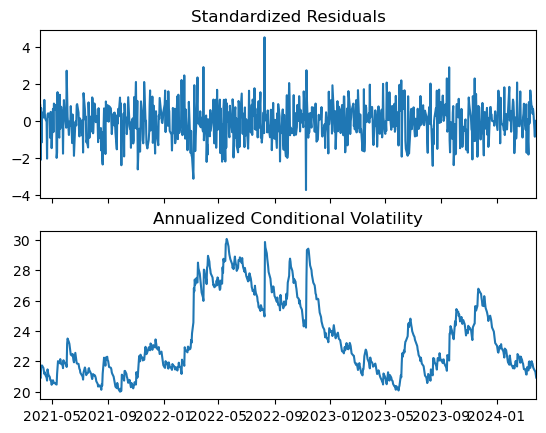

In [15]:
fig = res.plot(annualize="D")
